## pandasとデータ分析
pandasはデータ分析では必ず利用する重要なツールです。この使い方を知るか知らないか、もしくは、やりたいことをグーグル検索しなくてもすぐに手を動かせるかどうかは、エンジニアとしての力量に直結します。ここでは、具体的なデータを元に私の経験から重要と思われるメソッドや使い方を説明します。他に重要な使い方に遭遇したらどんどん追記していきます。


### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/article/library/pandas/pandas_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/article/library/pandas/pandas_nb.ipynb)

### 筆者の環境
筆者のOSはmacOSです。LinuxやUnixのコマンドとはオプションが異なります。

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G6020


In [2]:
!python -V

Python 3.7.3


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)

matplotlib version : 3.0.3
scipy version : 1.4.1
numpy version : 1.16.2


### importとバージョン確認

In [3]:
import pandas as pd

print('pandas version :', pd.__version__)

'0.23.1'

## pandasとデータ分析
pandasはデータ分析では必ず利用する重要なツールです。この使い方を知るか知らないか、もしくは、やりたいことをグーグル検索しなくてもすぐに手を動かせるかどうかは、エンジニアとしての力量に直結します。ここでは、具体的なデータを元に私の経験から重要と思われるメソッドや使い方を説明します。他に重要な使い方に遭遇したらどんどん追記していきます。

また、jupyter形式のファイルは[github](https://github.com/hiroshi0530/wa/blob/master/src/pandas/pandas_nb.ipynb)に置いておきます。

## 頻出のコマンド一覧
概要として、よく利用するコマンドを以下に載せます。

### ファイルのIO

#### CSVファイルの読み込み
```python
df.read_csv()
```

#### EXCELファイルの読み込み
```python
df.read_excel()
```

#### 先頭の5行を表示
```python
df.head()
```

#### 最後の5行を表示
```python
df.tail()
```

#### インデックスの確認
```python
df.index
```

#### サイズの確認
```python
df.shape
```

#### カラム名の確認
```python
df.columns
```

#### データ形式の確認
```python
df.dtypes
```

#### 
```python
df.loc[]
```

#### 
```python
df.iloc[]
```

#### 
```python
df.query()
```

#### 
```python
df.unique()
```

#### 
```python
df.drop_duplicates()
```

#### 
```python
df.describe()
```

#### 
```python
df.set_index()
```

#### 
```python
df.rename()
```

#### 
```python
df.sort_values()
```

#### 
```python
df.to_datetime()
```

#### 
```python
df.sort_index()
```

#### 
```python
df.apply()
```

#### 
```python
pd.cut()
```

#### 
```python
df.isnull()
```

#### 
```python
df.any()
```

#### 
```python
df.fillna()
```

#### 
```python
df.dropna()
```

#### 
```python
df.replace()
```

#### 
```python
df.mask()
```

#### 
```python
df.drop()
```

#### 
```python
df.value_counts()
```

#### 
```python
df.groupby()
```

#### 
```python
df.diff()
```

#### 
```python
df.rolling()
```

#### 
```python
df.pct_change()
```

#### 
```python
df.plot()
```

#### 
```python
df.pivot()
```

#### 
```python
pd.get_dummies()
```

#### 
```python
df.to_csv()
```

#### 
```python
pd.options.display.max_columns = None
```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```

#### 
```python

```



## 具体例

以下実際のデータを用いて、上記のコマンドの利用例を説明します。

### 環境
最初に、私の実行環境のOSとterminalの環境です。

In [1]:
!sw_vers

In [2]:
!uname -a | awk '{c="";for(i=3;i<=NF;i++) c=c $i" "; print c}'

18.7.0 Darwin Kernel Version 18.7.0: Tue Aug 20 16:57:14 PDT 2019; root:xnu-4903.271.2~2/RELEASE_X86_64 x86_64 


### データの読み込み
データの例として、Googleのtensorflowのページでも利用されている[Auto MPG](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/) のデータセットを利用します。wgetでデータをダウンロードします。-O オプションで上書きします。

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data -O ./auto-mpg.data   

--2020-04-16 00:10:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
archive.ics.uci.edu (archive.ics.uci.edu) をDNSに問いあわせています... 128.195.10.252
archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 30286 (30K) [application/x-httpd-php]
`./auto-mpg.data' に保存中

./auto-mpg.data     100%[===================>]  29.58K  --.-KB/s 時間 0.1s       

2020-04-16 00:10:13 (198 KB/s) - `./auto-mpg.data' へ保存完了 [30286/30286]



データ属性は[本家のホームページ](https://archive.ics.uci.edu/ml/datasets/auto+mpg)によると、

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

となっています。詳細は[本家のホームページ](https://archive.ics.uci.edu/ml/datasets/auto+mpg)を参照してください。

データの概要を見てみます。

In [5]:
!head -n 5 auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"


9個のカラムがあります。また、データの区切り形式を確認するため、タブを可視化するコマンドを実行します。catのtオプションになります。私の環境はmacOSですので、linux環境の方はmanで調べてください。

In [6]:
!head -n 5 auto-mpg.data | cat -evt

18.0   8   307.0      130.0      3504.      12.0   70  1^I"chevrolet chevelle malibu"$
15.0   8   350.0      165.0      3693.      11.5   70  1^I"buick skylark 320"$
18.0   8   318.0      150.0      3436.      11.0   70  1^I"plymouth satellite"$
16.0   8   304.0      150.0      3433.      12.0   70  1^I"amc rebel sst"$
17.0   8   302.0      140.0      3449.      10.5   70  1^I"ford torino"$


これより、最後のカラムの前にタブがあるのがわかります。少々わかりにくいですが、^I がタブの目印になります。

これだと、区切り文字が空白とタブが混在しているので、タブを空白に置換します。出来れば、sedでタブを置換したいのですが、sedの挙動がmacOSとlinuxで異なるので、やや冗長ですが、一度中間ファイルを作成します。実際のタブの置換はtrを利用します。

In [7]:
!cat auto-mpg.data | tr '\t' ' ' >> temp.data
!mv temp.data auto-mpg.data && rm -f temp.data
!head -n 5 auto-mpg.data | cat -evt

18.0   8   307.0      130.0      3504.      12.0   70  1 "chevrolet chevelle malibu"$
15.0   8   350.0      165.0      3693.      11.5   70  1 "buick skylark 320"$
18.0   8   318.0      150.0      3436.      11.0   70  1 "plymouth satellite"$
16.0   8   304.0      150.0      3433.      12.0   70  1 "amc rebel sst"$
17.0   8   302.0      140.0      3449.      10.5   70  1 "ford torino"$


最後のコマンドでタブの有無を確認すると、確かにタブが消えています。ここでようやく準備が整いました。このファイルをpandasを用いて読み込みます。その際、column名を指定します。

ここまでの流れは面倒と感じるかもしれませんが、データ分析の仕事をしているとデータ分析コンテストのように整然としたデータがそろっていることの方が珍しいです。データを整える前処理も重要な仕事です。それらにはlinuxのコマンドを使いこなすことが重要です。

In [8]:
column_names = ['mpg','cylinders','displacement','horsepower','weight',
                'acceleration', 'model year', 'origin', 'car name'] 

df = pd.read_csv('./auto-mpg.data', 
                 names=column_names,
                 sep=' ',
                 skipinitialspace=True)

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


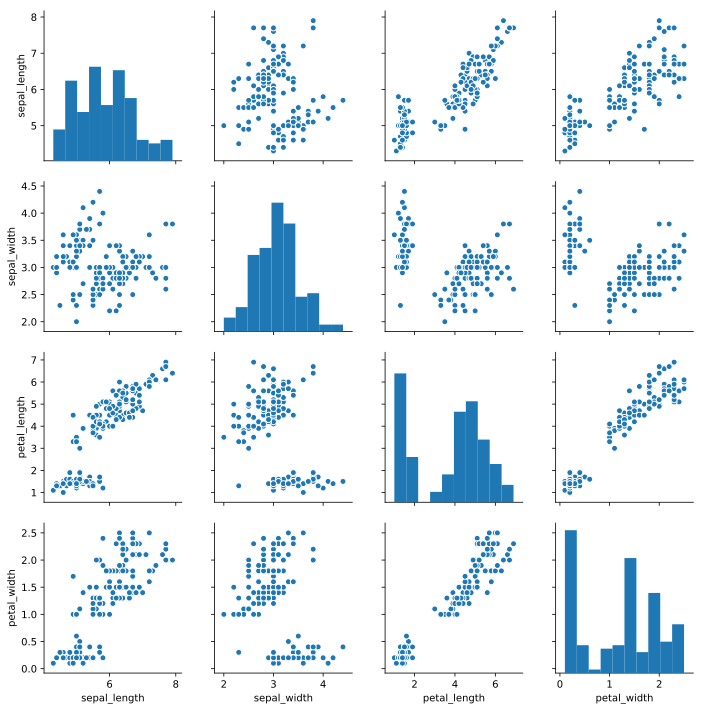

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns

iris = sns.load_dataset("iris")
sns.pairplot(iris)

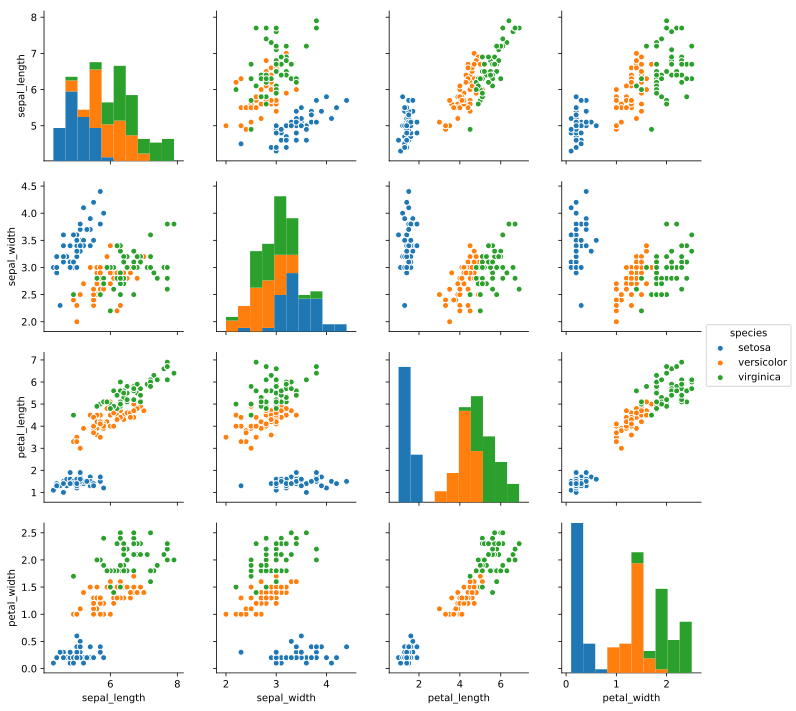

In [11]:
sns.pairplot(iris, hue="species")

## よく使う関数

最後のまとめとして、良く使う関数をまとめておきます。

#### インデックスの変更(既存のカラム名に変更)

```python
df.set_index('xxxx')
```

#### カラム名の変更

```python
df.rename(columns={'before': 'after'}, inplace=True)
```

#### あるカラムでソートする

```python
df.sort_values(by='xxx', ascending=True)
```

#### インデックスでソートする

```python
df.sort_index()
```

#### datetime型の型変換
```python
df.to_datetime()
```

#### NaNのカラムごとの個数
```python
df.isnull().sum()
```




## 参考文献
- [チートシート](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [read_csvの全引数について解説してくれてます](https://own-search-and-study.xyz/2015/09/03/pandas%E3%81%AEread_csv%E3%81%AE%E5%85%A8%E5%BC%95%E6%95%B0%E3%82%92%E4%BD%BF%E3%81%84%E3%81%93%E3%81%AA%E3%81%99/)

In [2]:
!ls -al

total 1496
drwxr-xr-x   9 hiroshi  staff     288  7 30 00:32 .
drwxr-xr-x  11 hiroshi  staff     352  7 26 01:04 ..
-rw-r--r--   1 hiroshi  staff      14  5 31 00:49 .gitignore
drwxr-xr-x   4 hiroshi  staff     128  5 31 00:49 .ipynb_checkpoints
-rw-r--r--   1 hiroshi  staff    5675  7 30 00:31 country_timeschedules.csv
-rw-r--r--   1 hiroshi  staff  730870  7 30 00:32 pandas_nb.ipynb
-rw-r--r--   1 hiroshi  staff   11266  7 30 00:32 pandas_nb.md
-rw-r--r--   1 hiroshi  staff    8154  7 30 00:32 pandas_nb.py
drwxr-xr-x   4 hiroshi  staff     128  7 30 00:32 pandas_nb_files


In [4]:
import pandas as pd

df = pd.read_csv('./country_timeseries.csv')
df.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
